# SciPy - Integrate

https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

When a function cannot be integrated analytically, or is very difficult to integrate analytically, one generally turns to numerical integration methods. 

SciPy has a number of routines for performing numerical integration. 

Most of them are found in the same scipy.integrate library.

Quad:

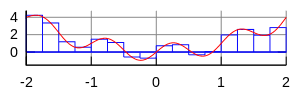

Trapezoidal:

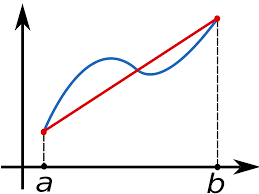

The following table lists some commonly used functions:
    
| No  | Function and Description |
| :-- | :----------------------- |
| 1   | quad (quadrangle, a kind of four-sided courtyard) |
|     | Single integration |
| 2   | dblquad |
|     | Double integration |
| 3   | tplquad |
|     | Triple integration |
| 4   | nquad |
|     | n-fold multiple integration |
| 5   | fixed_quad |
|     | Gaussian quadrature, order n |
| 6   | quadrature |
|     | Gaussian quadrature to tolerance |
| 7   | romberg |
|     | Romberg integration |
| 8   | trapz |
|     | Trapezoidal rule |
| 9   | cumtrapz |
|     | Trapezoidal rule to cumulatively compute integral |
| 10  | simps |
|     | Simpson’s rule |
| 11  | romb |
|     | Romberg integration |
| 12  | polyint |
|     | Analytical polynomial integration (NumPy) |
| 13  | poly1d |
|     | Helper function for polyint (NumPy) |

# General integration (quad)

The function quad is provided to integrate a function of one variable between two points. 

The points can be $\pm∞$ ($\pm$inf) to indicate infinite limits. 

For example, suppose you wish to integrate a bessel function jv(2.5, x) along the interval [0, 4.5]. 

$$I = \int_{0}^{4.5} J_{2.5}(x) dx$$

## Example: Computed Bessel Function using quad:

In [2]:
import scipy.integrate as integrate
import scipy.special as special

# quad integration of Bessel Function
result = integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5)
print('Quad result:')
print(result)
print()
#(1.1178179380783249, 7.8663172481899801e-09)

# Trapezoidal example:

#(1.1178179380783249, 7.8663172481899801e-09)
from numpy import sqrt, sin, cos, pi
# Analitical solution of Bessel Function
I = sqrt(2/pi)*(18.0/27*sqrt(2)*cos(4.5) - 4.0/27*sqrt(2)*sin(4.5) +
                sqrt(2*pi) * special.fresnel(3/sqrt(pi))[0])
print('Exact I:')
print(I)
print()
# 1.117817938088701

print('abs(Quad result[0]-Exact I):')
print(abs(result[0]-I))

Quad result:
(1.1178179380783244, 7.866317216380707e-09)

Exact I:
1.117817938088701

abs(Quad result[0]-Exact I):
1.0376588477356563e-11


### Note:
    
The first argument to quad is a “callable” Python object (i.e., a function, method, or class instance). 

Notice the use of a lambda- function in this case as the argument. The next two arguments are the limits of integration. The return value is a tuple, with the first element holding the estimated value of the integral and the second element holding an upper bound on the error. Notice, that in this case, the true value of this integral is

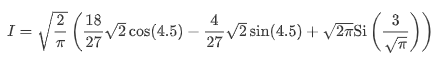

where

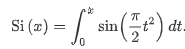


is the Fresnel sine integral. Note that the numerically-computed integral is within 1.0376588477356563e-11 of the exact result — well below the reported error bound.

## Integrate Function

If the function to integrate takes additional parameters, they can be provided in the args argument. 

Suppose that the following integral shall be calculated:

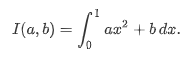

This integral can be evaluated by using the following code:

In [5]:
from scipy.integrate import quad

def integrand(x, a, b):
    return a*x**2 + b

a = 2
b = 1
I = quad(integrand, 0, 1, args=(a,b))
print('I:')
print(I)
print()
# (1.6666666666666667, 1.8503717077085944e-14)

I:
(1.6666666666666667, 1.8503717077085944e-14)



# Infinity Input

Infinite inputs are also allowed in quad by using +/-inf as one of the arguments. 

For example, suppose that a numerical value for the exponential integral:

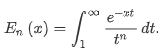

is desired (and the fact that this integral can be computed as special.expn(n,x) is forgotten).

The functionality of the function special.expn can be replicated by defining a new function vec_expint based on the routine quad:

In [7]:
import numpy as np
from scipy.integrate import quad
def integrand(t, n, x):
    return np.exp(-x*t) / t**n


def expint(n, x):
    return quad(integrand, 1, np.inf, args=(n, x))[0]

vec_expint = np.vectorize(expint)
print('vec_expint(3, np.arange(1.0, 4.0, 0.5))):')
print(vec_expint(3, np.arange(1.0, 4.0, 0.5)))
print()

# array([ 0.1097,  0.0567,  0.0301,  0.0163,  0.0089,  0.0049])
import scipy.special as special
print('special.expn(3, np.arange(1.0,4.0,0.5))):')
print(special.expn(3, np.arange(1.0,4.0,0.5)))
print()
#array([ 0.1097,  0.0567,  0.0301,  0.0163,  0.0089,  0.0049])

vec_expint(3, np.arange(1.0, 4.0, 0.5))):
[0.10969197 0.05673949 0.03013338 0.01629537 0.00893065 0.00494538]

special.expn(3, np.arange(1.0,4.0,0.5))):
[0.10969197 0.05673949 0.03013338 0.01629537 0.00893065 0.00494538]



## Another Single Integrals Example

https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html
    
The Quad function is the workhorse of SciPy’s integration functions. Numerical integration is sometimes called quadrature, hence the name. It is normally the default choice for performing single integrals of a function f(x) over a given fixed range from a to b.

$$\int_{a}^{b} f(x)dx$$

The general form of quad is scipy.integrate.quad(f, a, b), Where ‘f’ is the name of the function to be integrated. Whereas, ‘a’ and ‘b’ are the lower and upper limits, respectively. Let us see an example of the Gaussian function, integrated over a range of 0 and 1.

We first need to define the function $f(x) = e^{-x^2}$ , this can be done using a lambda expression and then call the quad method on that function.

y:
0.7468241328124271


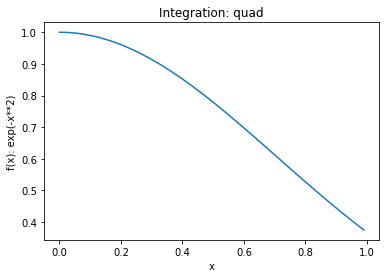

In [64]:
import scipy.integrate
from numpy import exp
import matplotlib.pyplot as plt

x = np.arange(0.0,1.0,0.01)
f = lambda x:exp(-x**2)
# f = lambda x:x**2
y, err = scipy.integrate.quad(f, 0, 1)

#print('x:')
#print(x)
print('y:')
print(y)

plt.title("Integration: quad")
plt.xlabel("x")
plt.ylabel("f(x): exp(-x**2)")
plt.plot(x, f(x))

plt.show()

### Note: 

The quad function returns the two values, in which the first number is the value of integral and the second value is the estimate of the absolute error in the value of integral.

Since quad requires the function as the first argument, we cannot directly pass exp as the argument. 

The Quad function accepts positive and negative infinity as limits. 

The Quad function can integrate standard predefined NumPy functions of a single variable, such as exp, sin and cos.

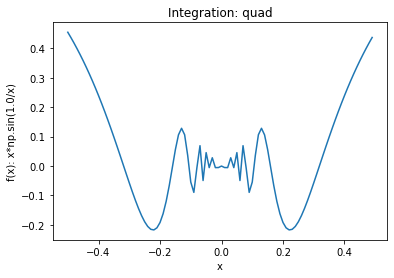

y: 0.37853001753997906


In [71]:
# https://scicomp.stackexchange.com/questions/21869/plot-integral-function-with-scipy-and-matplotlib
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
#%matplotlib inline

def f(x):
    res = x*np.sin(1.0/x)
    return res

X = np.arange(-0.5,0.5,0.01)
#print('X:')
#print(X)
#plot(X,f(X))

plt.title("Integration: quad")
plt.xlabel("x")
plt.ylabel("f(x): x*np.sin(1.0/x)")
plt.plot(X,f(X))
plt.show()

y, err = scipy.integrate.quad(f, 0, 1, limit=500)
print('y:', y)

## Multiple Integrals

The mechanics for double and triple integration have been wrapped up into the functions dblquad, tplquad and nquad. 

These functions integrate four or six arguments, respectively. 

The limits of all inner integrals need to be defined as functions.

### Double Integrals

The general form of dblquad is scipy.integrate.dblquad (func, a, b, gfun, hfun). 

Where, func is the name of the function to be integrated, 'a' and 'b' are the lower and upper limits of the x variable, respectively, while gfun and hfun are the names of the functions that define the lower and upper limits of the y variable.

As an example, let us perform the double integral method.

$$\int_{0}^{1/2} dy \int_{0}^{\sqrt{1-4y^2}} 16xy \:dx$$

We define the functions f, g, and h, using the lambda expressions. 

Note that even if g and h are constants, as they may be in many cases, they must be defined as functions, as we have done here for the lower limit.

In [61]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import scipy.integrate

from numpy import exp
from math import sqrt

x = np.arange(0.0, 0.5,0.01)

f = lambda x, y : 16*x*y
g = lambda x : 0
h = lambda y : sqrt(1-4*y**2)
y, err = scipy.integrate.dblquad(f, 0, 0.5, g, h)
print ('y:', y, 'err:', err)

y: 0.5 err: 1.7092350012594845e-14


### Note:

In addition to the routines described above, scipy.integrate has a number of other integration routines, including nquad, which performs n-fold multiple integration, as well as other routines that implement various integration algorithms. 

However, quad and dblquad will meet most of our needs for numerical integration